# Generar mapa distribución lluvia registrada en cuenca nivel 2

## Importar librerias

In [1]:
import pandas as pd
import numpy as np; np.random.seed(0)
import matplotlib.pylab as plt
import seaborn as sns
import requests
import json

from IPython.display import HTML

## Acceder a los datos de precipitación procesadas en Delft-FEWS para Cuencas Hidrográficas Nivel 2

**Importante** Se recomienda estar conectado a la VPN de Presidencia para acceder a travez de Servicio web 

In [2]:
# URL de acceso al servicio web de producción de FEWS-Uruguay
url_base = 'http://prodtec-fssaws:8080/FewsWebServices/rest/fewspiservice/v1/timeseries?'
headers = {'Accept':'application/json'}
# Parametros de busqueda para MAP en cuenca nivel 2
documentVersion='1.24'
documentFormat='PI_JSON'
filterid = 'CuencaNivel2'
parameterIds = 'P.cuenca'
moduleInstanceIds = 'PreprocessP'
# Fecha de inicio de busqueda y finalización. Importante brindar la fecha en UTC
startTime = '2023-07-02T10:00:00Z'
endTime = '2023-08-01T10:00:00Z'
# URL de busqueda de datos de MAP 
url = f"{url_base}filterId={filterid}&parameterIds={parameterIds}&moduleInstanceIds={moduleInstanceIds}&startTime={startTime}&endTime={endTime}&documentFormat={documentFormat}"

In [3]:
# Abrir consulta con parametros de busqueda
r = requests.get(url,headers=headers)
r.close()
# Debido a que la respuesta es en JSON entonces se convierte a formato JSON
data = json.loads(r.content.decode('utf-8'))

In [4]:
allbasins_n2 = pd.read_csv(f'cuencas_nombres.csv')

In [5]:
allbasins_n2

,codcuenca,nombre
0,10,RÍO CUAREIM
1,11,RÍO URUGUAY entre Río Cuareim y Río Arapey
2,12,RÍO ARAPEY CHICO
3,13,RÍO ARAPEY GRANDE
4,14,RÍO URUGUAY entre Río Arapey y Río Dayman
5,15,RÍO DAYMAN
6,16,RÍO URUGUAY entre Río Dayman y Río Queguay
7,17,RÍO QUEGUAY GRANDE
8,18,RÍO URUGUAY entre Río Queguay y Río Negro
9,19,RÍO URUGUAY entre Río Negro y Río de la Plata


In [6]:
# Extrae los datos de MAP para cada cuenca hidrografica
df = pd.DataFrame()
for x in range(len(data['timeSeries'])):
    extraer_estacion = data['timeSeries'][x]['header']['locationId']
    datos_estacion = pd.DataFrame(data['timeSeries'][x]['events'])
    df[extraer_estacion] = datos_estacion['value'].values
# Une los datos de fecha y hora
datos_estacion = datos_estacion.drop(columns=['value','flag'])
datos_estacion = pd.to_datetime(datos_estacion['date'] + ' ' + datos_estacion['time'])
datos_estacion.to_frame()
# Une los datos con las fechas de serie de tiempo
df = pd.concat([datos_estacion, df],axis=1,join='inner')
df = df.rename(columns= {0: 'FECHA'})
# Convierte la hora de UTC a UTC-0300 (hora Montevideo)
df['FECHA'] = df['FECHA'] - pd.Timedelta(hours=3)
df['FECHA'] = df['FECHA'] - pd.Timedelta(days=1)
df.set_index('FECHA')
df.sort_index(ascending=True)
display(df.tail(20))

,FECHA,10,11,12,13,14,15,16,17,18,...,58,60,61,62,63,64,65,66,67,68
11,2023-07-12 07:00:00,26.62,19.23,34.69,45.62,24.42,46.37,48.47,52.47,53.74,...,46.74,25.19,26.94,29.95,23.71,23.82,34.25,15.99,14.08,17.79
12,2023-07-13 07:00:00,4.78,3.74,6.72,2.85,4.41,6.1,4.94,5.38,6.46,...,4.69,0.2,0.02,0.01,0.02,0.01,0.08,0,0,0
13,2023-07-14 07:00:00,0,0.09,0.3,0.11,0,0,0,0.02,0.04,...,0.01,0.01,0,0,0,0,0,0,0,0
14,2023-07-15 07:00:00,0,0.04,0.14,0.03,0.01,0,0,0,0.01,...,0,0,0,0.02,0.02,0.15,0,0,0,0
15,2023-07-16 07:00:00,0,0,0.21,0.02,0,0,0,0,0.01,...,0,0,0.02,0.06,0.01,0.03,0,0.09,0.05,0.01
16,2023-07-17 07:00:00,0,0,0,0,0,0,0,0.02,0.03,...,0,0.02,0,0.01,0.02,0.01,0,0,0,0
17,2023-07-18 07:00:00,0.03,0,0,0,0,0,0,0,0,...,0.03,0,0.01,0,0,0,0,0,0,0
18,2023-07-19 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0.03,0.02,0.02,0.04,0.2,0.01,0.19,0.09,0.03
19,2023-07-20 07:00:00,0.02,0,0.16,0.09,0,0,0,0.04,0,...,0,0,0,0,0,0,0,0,0,0
20,2023-07-21 07:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
cols = ['FECHA','63','67','28','52','45','42','40','31','33','32','30','12','13','44','10','15','27','29','24','22','26','20','58','55','54','57','50','43','17','23','65','21','61','64','68','66','62','60','53','51','41','14','11','16','19','18','56']
df = df[cols]

In [8]:
df.to_clipboard(index=False)

In [9]:
piv = pd.pivot_table(df,columns=["FECHA"])
piv[piv < 0] = np.NaN
display(piv.tail(10))

FECHA,2023-07-01 07:00:00,2023-07-02 07:00:00,2023-07-03 07:00:00,2023-07-04 07:00:00,2023-07-05 07:00:00,2023-07-06 07:00:00,2023-07-07 07:00:00,2023-07-08 07:00:00,2023-07-09 07:00:00,2023-07-10 07:00:00,...,2023-07-22 07:00:00,2023-07-23 07:00:00,2023-07-24 07:00:00,2023-07-25 07:00:00,2023-07-26 07:00:00,2023-07-27 07:00:00,2023-07-28 07:00:00,2023-07-29 07:00:00,2023-07-30 07:00:00,2023-07-31 07:00:00
58,0.00,0.00,0.00,6.34,3.81,10.81,4.10,0.0,0.00,0.07,...,0.00,0.68,3.94,6.20,0.04,0.02,0.00,0.00,0.0,0.00
60,0.00,0.02,0.01,18.23,13.43,7.87,0.02,0.0,0.03,0.03,...,0.22,0.06,7.08,10.87,1.73,0.05,0.00,0.02,0.0,0.02
61,0.00,0.00,0.00,15.18,14.28,7.38,0.07,0.0,0.00,0.02,...,0.02,0.03,8.78,12.57,0.32,0.22,0.00,0.00,0.0,0.00
62,0.00,0.00,0.00,16.29,11.16,15.10,0.04,0.0,0.00,0.00,...,0.79,0.00,3.51,6.04,0.64,0.02,0.01,0.00,0.0,0.01
63,0.04,0.00,0.00,15.50,6.32,9.69,0.02,0.0,0.44,0.00,...,2.50,0.00,0.02,6.53,0.86,0.02,0.02,0.00,0.0,0.03
64,0.00,0.00,0.00,14.04,11.51,11.55,0.15,0.0,0.03,0.00,...,1.49,0.00,0.00,8.39,0.63,0.00,0.01,0.00,0.0,0.04
65,0.00,0.00,0.00,12.54,10.27,9.22,0.01,0.0,0.00,0.00,...,0.36,0.12,2.95,4.65,0.56,0.01,0.00,0.00,0.0,0.00
66,0.00,0.00,0.00,16.93,1.13,9.50,0.00,0.0,0.10,0.00,...,0.15,0.00,0.00,9.44,0.68,0.00,0.00,0.00,0.0,0.09
67,0.30,0.00,0.00,19.14,1.84,5.89,0.00,0.0,0.55,0.00,...,0.67,0.00,0.05,8.49,0.82,0.05,0.00,0.00,0.0,0.05
68,0.00,0.00,0.00,20.52,2.69,2.32,0.00,0.0,0.71,0.00,...,0.89,0.00,0.00,8.23,1.48,0.17,0.00,0.00,0.0,0.01


In [10]:
piv2 = piv.transpose()
HTML(piv2.tail(2).to_html())

,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31,32,33,40,41,42,43,44,45,50,51,52,53,54,55,56,57,58,60,61,62,63,64,65,66,67,68
FECHA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2023-07-30 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.01,0.01,0.00,0.0,0.01,0.02,0.00,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
2023-07-31 07:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.01,0.0,0.0,0.04,0.03,0.02,0.1,0.01,0.04,0.01,0.0,0.01,0.03,0.02,0.0,0.0,0.01,0.01,0.0,0.02,0.0,0.01,0.03,0.04,0.0,0.09,0.05,0.01


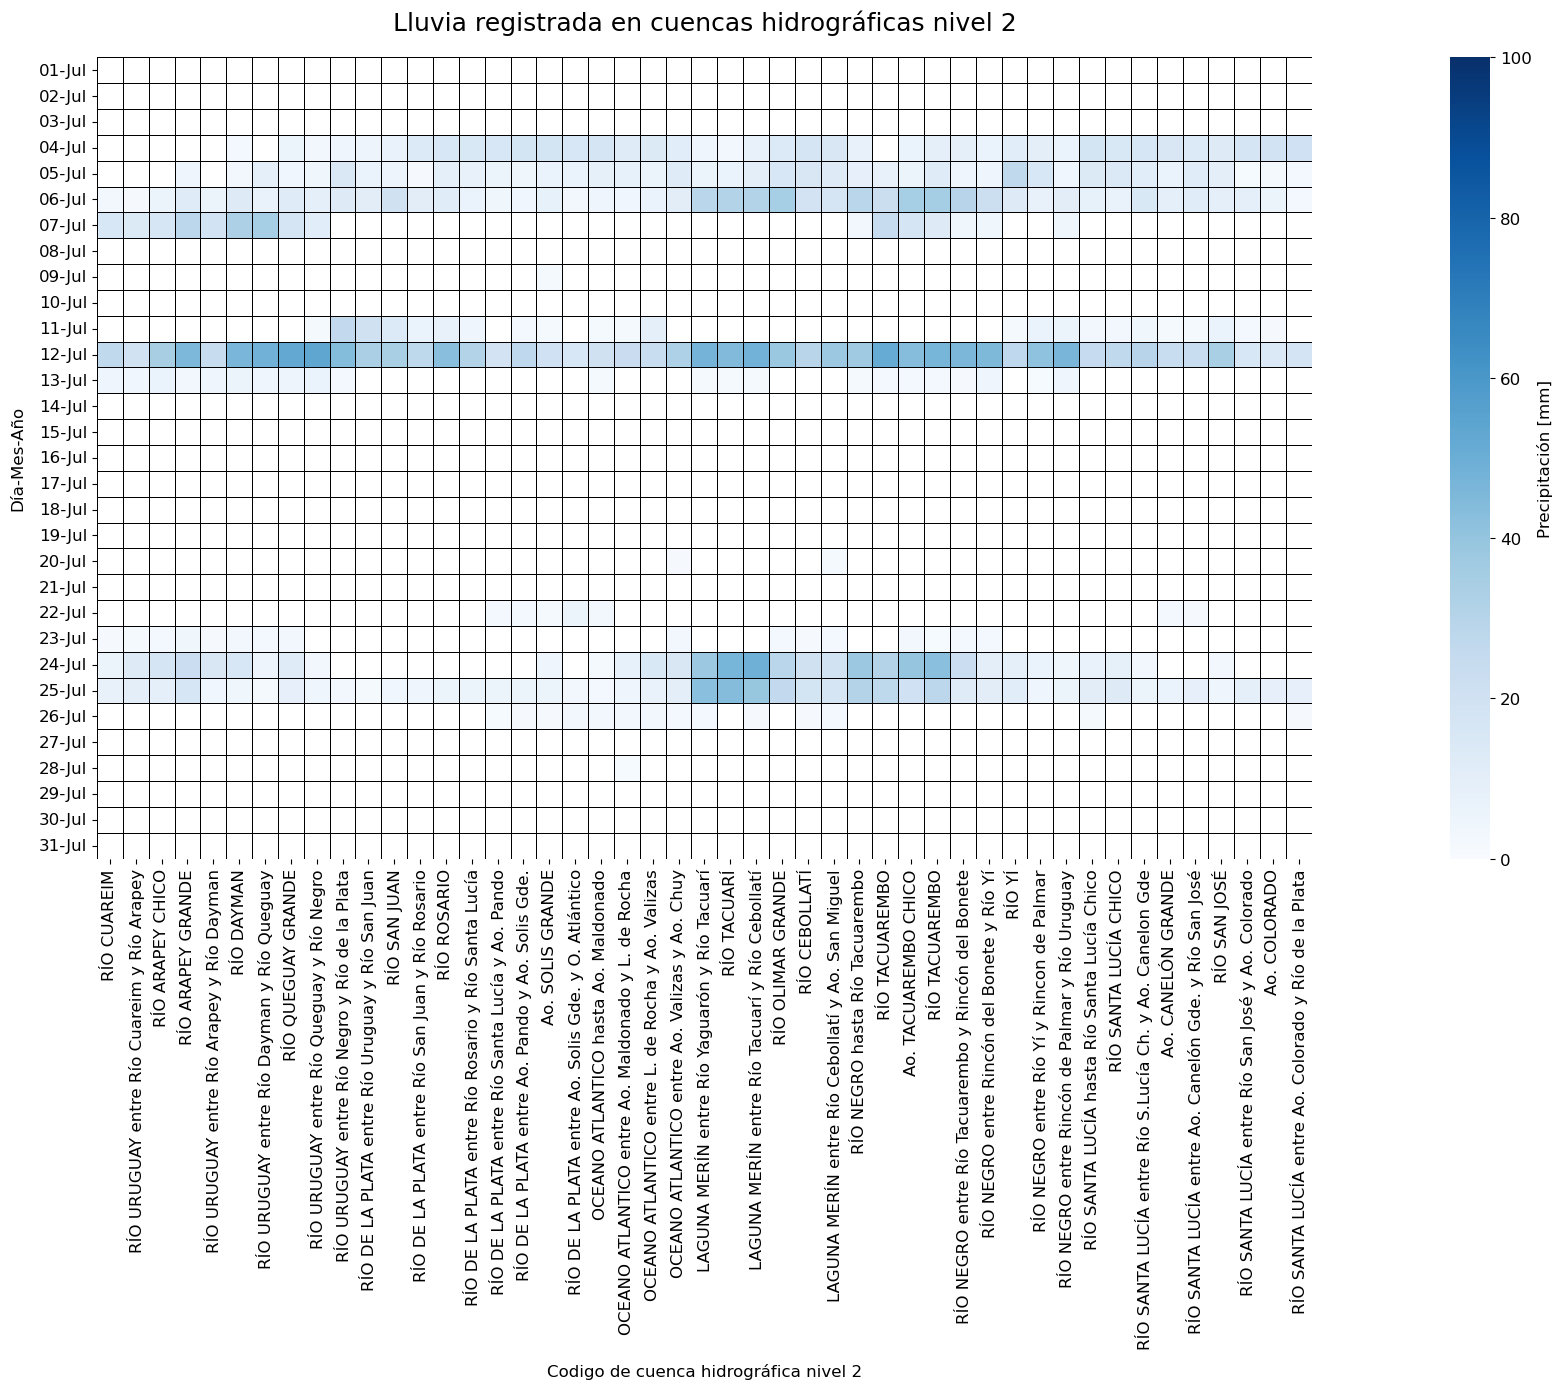

In [11]:
from cProfile import label
from matplotlib.pyplot import axis
from numpy import size, sort
import matplotlib
from matplotlib import pyplot as plt

font_size = 12
fig, ax = plt.subplots(figsize=(28,14))

values = piv2.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
# cmap = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))
cmap = "Blues"
# cmap = "YlGnBu"

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv2,square=True,cmap=cmap,annot=False,vmin=0, vmax=100,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 1,ax=ax)

ax.set_title('Lluvia registrada en cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

ax.set_ylabel('Día-Mes-Año',rotation=90, labelpad=10,size=font_size)
ax.set_yticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_xlabel('Codigo de cuenca hidrográfica nivel 2', rotation=0, labelpad=10, fontsize=font_size)
ax.tick_params(axis='x', labelsize=font_size)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

ax.set_xticklabels(allbasins_n2.nombre,rotation=90)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
# plt.savefig('final.png', dpi=1000, bbox_inches='tight')

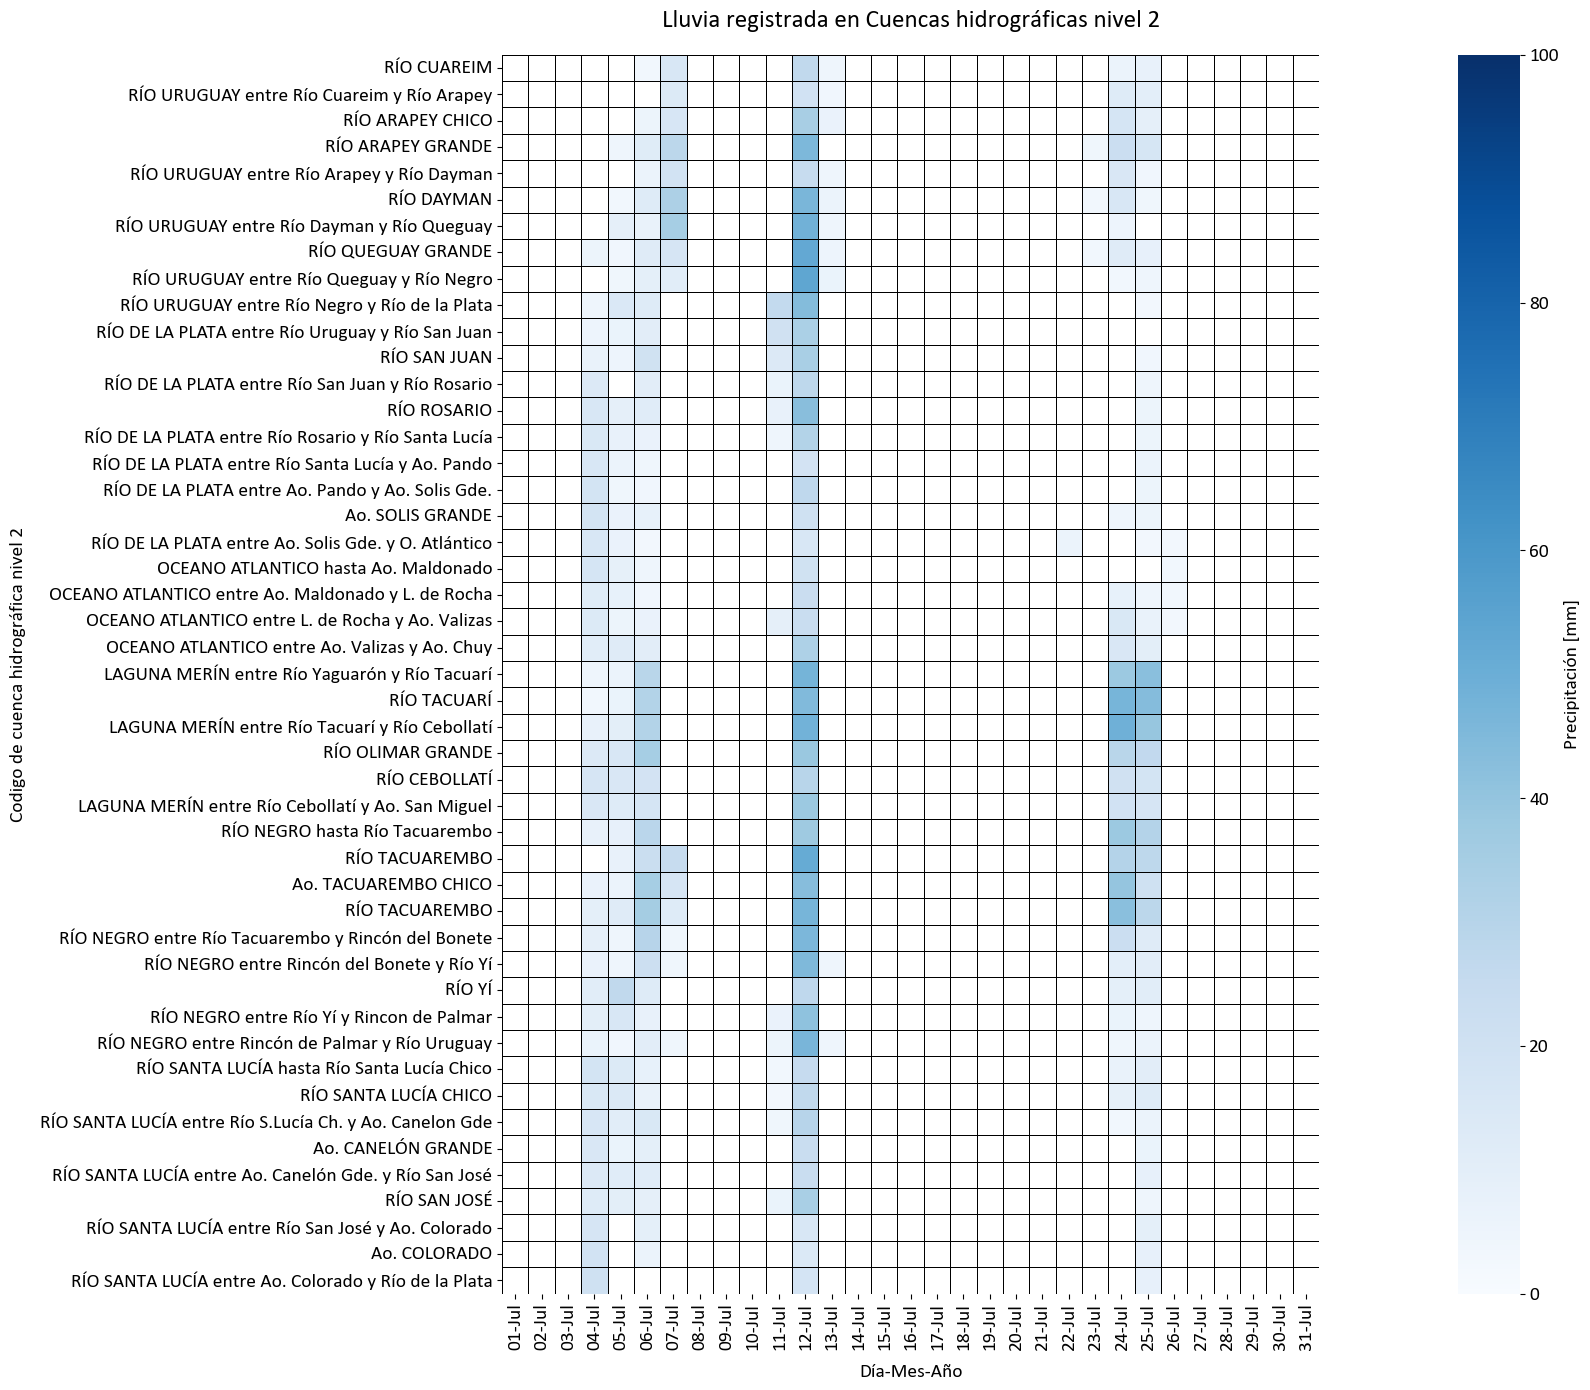

In [12]:
fig, ax = plt.subplots(figsize=(28,14))

values = piv.to_numpy(dtype=float)

myColors = ['#ffffff','#F7FCF0','#E0F3DB','#CCEBC5','#A8DDB5','#7BCCC4','#4EB3D3','#2B8CBE','#0868AC','#084081']
cmap2 = matplotlib.colors.LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

font_size = 14

# sns.set(font_scale=1) # font size 2 
# ax = sns.heatmap(piv2,square=True,cmap="YlGnBu",vmin=0, vmax=100,annot=True,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": .82,"label":'Precipitación [mm]'},mask=values == 0,ax=ax)
ax = sns.heatmap(piv,square=True,cmap="Blues",vmin=0, vmax=100,annot = False,linewidths=0.5,linecolor='black',annot_kws={'fontsize':8},cbar_kws={"shrink": 1,"label":'Precipitación [mm]'},mask=values < 3,ax=ax)

ax.set_title('Lluvia registrada en Cuencas hidrográficas nivel 2', pad=20, loc='center',size=18)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)

ax.set_xlabel('Día-Mes-Año',rotation=0, labelpad=10,size=font_size)
ax.set_xticklabels(df['FECHA'].dt.strftime('%d-%b'),fontsize=font_size)

ax.set_ylabel('Codigo de cuenca hidrográfica nivel 2', rotation=90, labelpad=10, fontsize=font_size)
ax.tick_params(axis='y', labelsize=font_size)

ax.set_yticklabels(allbasins_n2.nombre,rotation=0)

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=font_size)
ax.figure.axes[-1].yaxis.label.set_size(font_size)

plt.rcParams.update({'font.family':'Calibri'})
plt.tight_layout()
plt.savefig('final.png', dpi=1000, bbox_inches='tight')